# Deterministic particle ecology

In this figure we showcase the trajectory of the deterministic particle ecology accross several collective generations for two sets of parameters. 

In [1]:
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
import estaudel.heredity.deterministic as ehd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.integrate

## Parameters

In [2]:
B = 15
K = 1500
T = 1

r_gen0 = [5.5,4]
A_gen0 = np.array([[0.8,0.15],
                   [0.15,0.8]])/K

r_gen9k = np.array([14,22])
A_gen9k = np.array([[0.8,0.01],
                   [0.5,0.3]])/K

# Get Data

In [3]:
traj_g0, plist_g0 = ehd.iterate_ecology(r_gen0,A_gen0, B, T)
gfunc_g0 = ehd.get_gfunc(r_gen0,A_gen0,B,T)

traj_gen9k, plist_gen9k = ehd.iterate_ecology(r_gen9k,A_gen9k, B, T)
gfunc_gen9k = ehd.get_gfunc(r_gen9k,A_gen9k,B,T)

## Functions

In [8]:
def plot_iteration(ax, g_func, plist,steps=100):
    ax.plot([0,1],[0,1], color='k', ls='-.', alpha=.1)
    
    xx = np.linspace(0,1,steps)
    ax.plot(xx,np.vectorize(g_func)(xx), color='C1', label='G(x)')

    for n,(p,p1) in enumerate(zip(plist[:-1],plist[1:])):
        ax.vlines(p,0,p1,color='C0')
        ax.hlines(p1,p,p1,color='k', linestyles='-.',alpha=.5)
        if n+2<len(plist):
            ax.vlines(p1,plist[n+2],p1,color='k',alpha=.5, linestyles='-.')
            
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    # Proportion of type 0 individuals at the beginning of the growth phase, 
    ax.set_xlabel('Proportion at collective birth, $N_0(0)/(N_0(0)+N_1(0))$')
    
    # 'Proportion of type 0 individuals at the end of the growth phase
    ax.set_ylabel('Proportion at collective selection, $\mu=N_0(T)/(N_0(T)+N_1(T))$')
    ax.legend()
    
def plot_statespace(ax,traj,r,a,B):
    xmax = np.max([1.1*np.max(x) for x in traj])
    ax.set_xlim((0, xmax))
    ax.set_ylim((0, xmax))
    ax.plot([0,xmax],[0,xmax], color='k', ls='-.', alpha=.1)
    ax.set_xlabel('Number of type 0 individuals, $N_0$')
    ax.set_ylabel('Number of type 1 individuals, $N_1$')
    ax.plot([0,B],[B,0], color='k',alpha=.2)
    # Quiver plot
    x = np.linspace(0,xmax,35)
    y = np.linspace(0,xmax,35)
    X,Y = np.meshgrid(y,x)
    U,V = np.zeros_like(X), np.zeros_like(X)
    for i,(x,y) in enumerate(zip(X.flat,Y.flat)):
        U.flat[i],V.flat[i] = ehd.lotka_volterra(np.array([x,y]),_=None,r=r,a=a)
    norm = np.sqrt(U**2+V**2)
    ax.streamplot(X, Y, U/norm, V/norm ,color=(0,0,0,.1))
    
    line_growth = []
    line_dil = []

    for t in traj:
        line = ax.plot(t[:,0],t[:,1],color='C0', alpha=.7)
        line_growth.append(line[0])
    for t,t2 in zip(traj[:-1],traj[1:]):  
        line = ax.plot([t[-1,0],t2[0,0]],[t[-1,1],t2[0,1]], ls='--',color='C0',alpha=.7)
        line_dil.append(line[0])
    line_growth[0].set_label('Growth')  
    line_dil[0].set_label('Dilution')    

    ax.legend()
    return fig,ax,line_growth,line_dil

# Plot

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


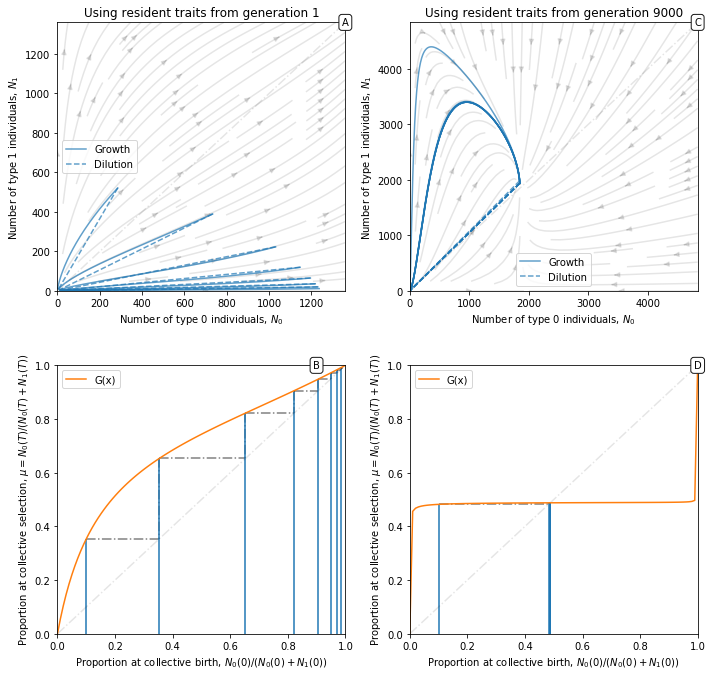

In [9]:
fig, ax = plt.subplots(2,2, figsize=(10,9.5))

plot_iteration(ax[1,0], gfunc_g0, plist_g0)
plot_statespace(ax[0,0], traj_g0,r_gen0,A_gen0, B)
plot_iteration(ax[1,1], gfunc_gen9k, plist_gen9k)
plot_statespace(ax[0,1], traj_gen9k, r_gen9k, A_gen9k, B)

ax[0,0].set(title='Using resident traits from generation 1')
ax[0,1].set(title='Using resident traits from generation 9000')

## Ax labels
bbox_legend = dict(xy=(1, 1), xycoords="axes fraction",
               ha='center', va='center',
                bbox=dict(boxstyle="round",
                   ec=(.1, 0.1, .1),
                   fc=(1., 1, 1),
               ))
def move(x):
    x = x.copy()
    x['xy']=(0.9, 1)
    return x

ax[0,0].annotate('A',**bbox_legend)
ax[1,0].annotate('B',**move(bbox_legend))
ax[0,1].annotate('C',**bbox_legend)
ax[1,1].annotate('D',**bbox_legend)

plt.tight_layout()
plt.savefig('deterministic_particle_ecology.pdf')